# Introduction to SpaCy and Use Cases

This tutorial is centered on Spacy, a syntactic parser often used in natural language processing. We will be looking at some basic use cases for this NLP library. Natural language processing deals with machines understanding and decoding human language. Given the inherent complexity of speech, this isn't an easy task. The ambiguity of language is what necessitates libraries like Spacy to help break down human language to machine understandable formats. 

Spacy is a free open source library, published by Explosion AI that holds the distinction of being the fastest syntactic parser and is built using Cython and Python. It's a helpful tool to figure out context/ themes of text, how words are related to each other, similarities between words etc. Spacy can be used as a pre-processing step in applications like sentiment analysis and areas that require information retrieval or deep learning. I've felt that this was a pretty useful tool to get a quick analysis of text and then decide what I can do with the data.

### Installation

Installation using the pip installer:

`pip install -U spacy`

If you're using conda for your work:

`conda install -c conda-forge spacy`

### Features

SpaCy has a rich linguistic features set allowing for text classification, training and more. The features [1] that are covered in this tutorial are: 


| Feature | What it does |
| --- | --- | --- |
|Lemmatization| Finds the lemma or base of a word. Eg: the lemma of mice -> mouse, is -> be.|  
|Named Entity Recognition (NER)| Identifies categories for real world objects. Labels are based on type, i.e. person, location etc.|
|Tokenization| Splits text into words, punctuation marks etc.|
|Sentence Boundary Detection| Identifies sentence limits and segments text into sentences.|
|Parts of Speech (PoS) tagging|Gives the relationship between tokens (root of a sentence, subject, object)|

There are statistical packages that support some of SpaCy's linguistic predictions. These models are offered in 8 languages like English, Spanish, German and Portuguese. Choosing a language module would depend on the reason you are using SpaCy and the type of text you have.  I will be using the English model. This model comes with lexical entries (words and their attributes), binary weights for some of the taggers, word vectors (to help with word similarities), and configuration options like processing pipeline options for loading the model you need[2].



>To look at some of the use cases, I have used a dataset [3] that contains 129 speeches delivered by former President, Barack Obama. The following code saves the speech data in two formats - a text string of 20 speeches together (20 for ease of use and a simple glimpse of how SpaCy can help) and a list of all the speeches. 

In [17]:
import spacy
import glob
file_list = glob.glob('./tutorial/ObamaSpeeches/*.txt') #the dataset will be found in the same file path
text=''
documents=[]
for file_path in file_list[:20]:
    each_file=open(file_path,encoding="utf8").read()
    text += each_file
    documents.append(each_file)
    
for file_path in file_list[20:]:
    doc_text = open(file_path,encoding="utf8").read()
    documents.append(doc_text)  


>We can load the spacy model using spacy.load. spacy.load('en') uses the language "en" and with the default pipeline of ["tagger", "parser", "ner"] (We'll look at pipelines in just a bit). Each pipeline component is created and added to the process pipeline. spacy.load finally returns a modified language class to use as a nlp object.

#### Pipelines [4]
> The nlp object tokenizes text to form a Doc object (tokenizer). Doc goes through a processing pipeline, that by default consists of a parser (part-of-speech tags), tagger (dependency labels for sentence structure) and entity recognizer (named entities). The pipeline is a chain of transformation where each component processes and gives out a modified Doc object. Custom components can also be added to the pipeline. 

>Deciding what components you need can make a significant difference in terms of speed memory usage. This can be done by using the 'disable' option in spacy.load. Here, for the purposes of the first use case, we need only the entity recognition component (ner) and I've disabled parser and tagger.




In [18]:
nlp = spacy.load('en', disable=['parser', 'tagger'])
parsed_text=nlp(text.lower())#stores the processed text after converting it all to lower case for ease of use
doc_list=[]
for doc_text in documents:
    doc = nlp(doc_text)  
    doc_list.append(doc)

In [4]:
print("A sample of the parsed text: \n",parsed_text[:30])


A sample of the parsed text: 
 
“…this congress should pass my proposal to give every responsible homeowner a chance to save an average of $3,000 a year by refinancing their mortgage at


>The parsed_text still seems to be in the format of text. The change is that each word or group of characters is now a token that has a set of properties attached to it. 

>Below is a basic example of using Spacy's tokenizer, the first step in the pipeline. We can analyze basic speech patterns and areas of interest by looking at what words are used the most. We use 'token.lemma' to measure word counts based on the root of the word. We can also use Spacy's is_stop to count words that are not stop words (commonly used words like the, a etc).

In [5]:
from collections import Counter
from operator import itemgetter
import re

word_list = Counter()
for token in parsed_text:#for each token in the dic object
    #match only alphabetical tokens and not count numbers or punctuation. Check for stop words.
    if re.match('[a-zA-Z]+$', (token.lemma_)) and ((token).is_stop==False):        
        lemma = token.lemma_
        word_list[lemma] += 1
#sort for highest word counts
sorted_list = sorted(word_list.items(),reverse=True,key=itemgetter(1))

frequency_table=[]

for index, key in enumerate(sorted_list):
        frequency_table.append((index+1, key[0], key[1]))

print("Top 20 Rank Word Frequency with Usage Count")
for index,key,val in frequency_table[:20]:
    print(index,key,val)

Top 20 Rank Word Frequency with Usage Count
1 be 183
2 not 166
3 have 157
4 people 130
5 go 119
6 work 114
7 country 111
8 year 101
9 right 90
10 applause 87
11 china 86
12 american 85
13 job 81
14 get 77
15 congress 76
16 think 75
17 like 71
18 president 71
19 tax 70
20 state 70


>For the next use case, we can take advantage of SpaCy's named entity recognizer. Each token's entity label can be accessed using 'ents' property of the parsed text. The entity has an associated label which describes the type of real world object it is. 
Examples of labels are:

>'ORG' -> organization

>'GPE' -> location; a country, city 

>'MONEY' -> monetary value

>Let's look at which countries and organizations were the most spoken about in these speeches and plot this. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

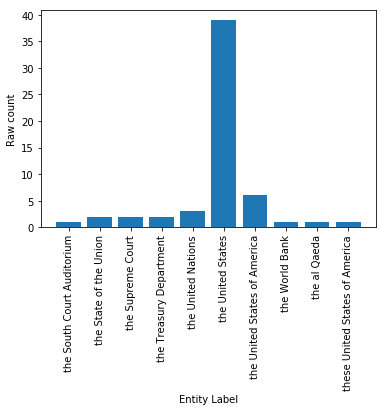

In [19]:
text2 = text.replace(u'\xa0', u' ')#SpaCy considers some spaces as entities as well; remove this character string. 
parsed_text=nlp(text2)

import matplotlib.pyplot as plt 
%matplotlib inline
ent_list = Counter()
for ent in parsed_text.ents:#for each entity in the entity set
    if(ent.label_=='ORG'or ent.label_=='GPE'):
        ent_list[ent.text]+=1

s_list = sorted(ent_list.items(),reverse=True)
#Plot the top 10 entities 
t_ent_type = [e for e, count in s_list[:10]]
t_counts = [count for e, count in s_list[:10]]
plt.bar(t_ent_type, t_counts)
plt.xlabel('Entity Label')
plt.ylabel('Raw count')
plt.xticks(rotation=90)
    

>SpaCy can be used for sentence segmentation, i.e. it can identify sentences within a chunk. This could be a useful preprocessing step for applications where the overall sentiment of a document needs to be analyzed. Sentence Boundary Detection uses the **parser** to function, which I had disabled earlier. So I create a new object with the parser enabled this time. The Doc object has an **is_parsed** property that allows you to check if the parsing has been done. Sentences can be accessed using __Doc.sents__ .

>The below code sentence segments one of President Obama's last speeches in office. The default parser splits on full stops and at punctuations where a new sentence seems to begin.



In [9]:
nlp2 = spacy.load('en')
text3 = documents[25]
text3 = text3.replace('"', '')
parsed_text3=nlp2(text3)
print("Text parsing successful? ",parsed_text3.is_parsed,"\n")
for idx, sentence in enumerate(parsed_text3.sents):
    print('Sentence number', idx, ':', sentence)

Text parsing successful?  True 

Sentence number 0 : 
Mr. President; Mr. Secretary General; fellow delegates; ladies and gentlemen:  
Sentence number 1 : As I address this hall as President for the final time, let me recount the progress that we’ve made these last eight years.

Sentence number 2 : From the depths of the greatest financial crisis of our time, we coordinated our response to avoid further catastrophe and return the global economy to growth.

Sentence number 3 : We’ve taken away terrorist safe havens, strengthened the nonproliferation regime, resolved the Iranian nuclear issue through diplomacy.

Sentence number 4 : We opened relations with Cuba, helped Colombia end Latin America’s longest war, and we welcome a democratically elected leader of Myanmar to this Assembly.

Sentence number 5 : Our assistance is helping people feed themselves, care for the sick, power communities across Africa, and promote models of development rather than dependence.

Sentence number 6 : And w

Sentence number 53 : Instead, we must work together to make sure the benefits of such integration are broadly shared, and that the disruptions — economic, political, and cultural — that are caused by integration are squarely addressed.

Sentence number 54 : This is not the place for a detailed policy blueprint, but let me offer in broad strokes those areas where I believe we must do better together.

Sentence number 55 : It starts with making the global economy work better for all people and not just for those at the top.

Sentence number 56 : While open markets, capitalism have raised standards of living around the globe, globalization combined with rapid progress and technology has also weakened the position of workers and their ability to secure a decent wage.

Sentence number 57 : In advanced economies like my own, unions have been undermined, and many manufacturing jobs have disappeared.  
Sentence number 58 : Often, those who benefit most from globalization have used their politi


Sentence number 109 : And perhaps those of us who have been promoting democracy feel somewhat discouraged since the end of the Cold War, because we’ve learned that liberal democracy will not just wash across the globe in a single wave.

Sentence number 110 : It turns out building accountable institutions is hard work
Sentence number 111 : —
Sentence number 112 : the work of generations.  
Sentence number 113 : The gains are often fragile.  
Sentence number 114 : Sometimes we take one step forward and then two steps back.

Sentence number 115 : In countries held together by borders drawn by colonial powers, with ethnic enclaves and tribal divisions, politics and elections can sometimes appear to be a zero-sum game.

Sentence number 116 : And so, given the difficulty in forging true democracy in the face of these pressures, it’s no surprise that some argue the future favors the strongman, a top-down model, rather than strong, democratic institutions.

Sentence number 117 : But I believe


Sentence number 160 : The mindset of sectarianism, and extremism, and bloodletting, and retribution that has been taking place will not be quickly reversed.

Sentence number 161 : And if we are honest, we understand that no external power is going to be able to force different religious communities or ethnic communities to co-exist for long.

Sentence number 162 : But I do believe we have to be honest about the nature of these conflicts, and our international community must continue to work with those who seek to build rather than to destroy.

Sentence number 163 : And there is a military component to that.  
Sentence number 164 : It means being united and relentless in destroying networks like ISIL, which show no respect for human life.  
Sentence number 165 : But it also means that in a place like Syria, where there’s no ultimate military victory to be won, we’re going to have to pursue the hard work of diplomacy that aims to stop the violence, and deliver aid to those in need, and 


Sentence number 214 : We should all welcome the pledges of increased assistance that have been made at this General Assembly gathering.  
Sentence number 215 : I’ll be discussing that more this afternoon.

Sentence number 216 : But we have to follow through, even when the politics are hard.  
Sentence number 217 : Because in the eyes of innocent men and women and children who, through no fault of their own, have had to flee everything that they know, everything that they love, we have to have the empathy to see ourselves.

Sentence number 218 : We have to imagine what it would be like for our family, for our children, if the unspeakable happened to us.  
Sentence number 219 : And we should all understand that, ultimately, our world will be more secure if we are prepared to help those in need and the nations who are carrying the largest burden with respect to accommodating these refugees.

Sentence number 220 : There are a lot of nations right now that are doing the right thing.  
Sent

>The beginning and ending indices of sentences are attached as properties of **sents**. We can use start and end properties to do this. I use some token properties such as **orth_** and **pos_** to display the verbatim form of the word and the parts of speech that a token is. This helps identify general speech structure, whether sentences are in the first person and more; which helps speech analysts. 

In [11]:
i=0
sentence_list=[]
#sents isn't subscriptable, using break for the first 5 sentences.
for sent in parsed_text3.sents:
    next_sentence=[]
    #sentence indices
    for i in range(sent.start, sent.end):
        next_sentence.append(parsed_text3[i])     
    i+=1
    sentence_list.append(next_sentence)
    if(i==5):
        break
        

for sent in sentence_list:
    for token in sent:
        print(token.orth_," is a ", token.pos_)


  is a  SPACE
Mr.  is a  PROPN
President  is a  PROPN
;  is a  PUNCT
Mr.  is a  PROPN
Secretary  is a  PROPN
General  is a  PROPN
;  is a  PUNCT
fellow  is a  ADJ
delegates  is a  NOUN
;  is a  PUNCT
ladies  is a  NOUN
and  is a  CCONJ
gentlemen  is a  NOUN
:  is a  PUNCT
    is a  SPACE
As  is a  ADP
I  is a  PRON
address  is a  VERB
this  is a  DET
hall  is a  NOUN
as  is a  ADP
President  is a  PROPN
for  is a  ADP
the  is a  DET
final  is a  ADJ
time  is a  NOUN
,  is a  PUNCT
let  is a  VERB
me  is a  PRON
recount  is a  VERB
the  is a  DET
progress  is a  NOUN
that  is a  ADP
we  is a  PRON
’ve  is a  VERB
made  is a  VERB
these  is a  DET
last  is a  ADJ
eight  is a  NUM
years  is a  NOUN
.  is a  PUNCT

  is a  SPACE
From  is a  ADP
the  is a  DET
depths  is a  NOUN
of  is a  ADP
the  is a  DET
greatest  is a  ADJ
financial  is a  ADJ
crisis  is a  NOUN
of  is a  ADP
our  is a  ADJ
time  is a  NOUN
,  is a  PUNCT
we  is a  PRON
coordinated  is a  VERB
our  is a  ADJ
response  

cooperation  is a  NOUN
and  is a  CCONJ
integration  is a  NOUN
.  is a  PUNCT
    is a  SPACE
Or  is a  CCONJ
we  is a  PRON
can  is a  VERB
retreat  is a  VERB
into  is a  ADP
a  is a  DET
world  is a  NOUN
sharply  is a  ADV
divided  is a  VERB
,  is a  PUNCT
and  is a  CCONJ
ultimately  is a  ADV
in  is a  ADP
conflict  is a  NOUN
,  is a  PUNCT
along  is a  ADP
age  is a  NOUN
-  is a  PUNCT
old  is a  ADJ
lines  is a  NOUN
of  is a  ADP
nation  is a  NOUN
and  is a  CCONJ
tribe  is a  NOUN
and  is a  CCONJ
race  is a  NOUN
and  is a  CCONJ
religion  is a  NOUN
.  is a  PUNCT

  is a  SPACE
I  is a  PRON
want  is a  VERB
to  is a  PART
suggest  is a  VERB
to  is a  ADP
you  is a  PRON
today  is a  NOUN
that  is a  ADP
we  is a  PRON
must  is a  VERB
go  is a  VERB
forward  is a  ADV
,  is a  PUNCT
and  is a  CCONJ
not  is a  ADV
backward  is a  ADJ
.  is a  PUNCT

  is a  SPACE
I  is a  PRON
believe  is a  VERB
that  is a  ADP
as  is a  ADV
imperfect  is a  ADJ
as  is a  ADP
they

longer  is a  ADV
fight  is a  VERB
world  is a  NOUN
wars  is a  NOUN
;  is a  PUNCT
that  is a  ADP
the  is a  DET
end  is a  NOUN
of  is a  ADP
the  is a  DET
Cold  is a  PROPN
War  is a  PROPN
lifted  is a  VERB
the  is a  DET
shadow  is a  NOUN
of  is a  ADP
nuclear  is a  ADJ
Armageddon  is a  PROPN
;  is a  PUNCT
that  is a  ADP
the  is a  DET
battlefields  is a  NOUN
of  is a  ADP
Europe  is a  PROPN
have  is a  VERB
been  is a  VERB
replaced  is a  VERB
by  is a  ADP
peaceful  is a  ADJ
union  is a  NOUN
;  is a  PUNCT
that  is a  ADP
China  is a  PROPN
and  is a  CCONJ
India  is a  PROPN
remain  is a  VERB
on  is a  ADP
a  is a  DET
path  is a  NOUN
of  is a  ADP
remarkable  is a  ADJ
growth  is a  NOUN
.  is a  PUNCT

  is a  SPACE
I  is a  PRON
say  is a  VERB
all  is a  ADJ
this  is a  DET
not  is a  ADV
to  is a  PART
whitewash  is a  VERB
the  is a  DET
challenges  is a  NOUN
we  is a  PRON
face  is a  VERB
,  is a  PUNCT
or  is a  CCONJ
to  is a  PART
suggest  is a  VER

a  is a  DET
shadow  is a  NOUN
banking  is a  NOUN
system  is a  NOUN
that  is a  ADJ
grows  is a  VERB
beyond  is a  ADP
the  is a  DET
reach  is a  NOUN
of  is a  ADP
effective  is a  ADJ
oversight  is a  NOUN
.  is a  PUNCT

  is a  SPACE
A  is a  DET
world  is a  NOUN
in  is a  ADP
which  is a  ADJ
one  is a  NUM
percent  is a  NOUN
of  is a  ADP
humanity  is a  NOUN
controls  is a  NOUN
as  is a  ADV
much  is a  ADJ
wealth  is a  NOUN
as  is a  ADP
the  is a  DET
other  is a  ADJ
99  is a  NUM
percent  is a  NOUN
will  is a  VERB
never  is a  ADV
be  is a  VERB
stable  is a  ADJ
.  is a  PUNCT

  is a  SPACE
I  is a  PRON
understand  is a  VERB
that  is a  ADP
the  is a  DET
gaps  is a  NOUN
between  is a  ADP
rich  is a  ADJ
and  is a  CCONJ
poor  is a  ADJ
are  is a  VERB
not  is a  ADV
new  is a  ADJ
,  is a  PUNCT
but  is a  CCONJ
just  is a  ADV
as  is a  ADP
the  is a  DET
child  is a  NOUN
in  is a  ADP
a  is a  DET
slum  is a  NOUN
today  is a  NOUN
can  is a  VERB
see  i

technologies  is a  NOUN
,  is a  PUNCT
and  is a  CCONJ
then  is a  ADV
make  is a  VERB
these  is a  DET
technologies  is a  NOUN
accessible  is a  ADJ
 is a  NOUN
of  is a  ADP
free  is a  ADJ
societies  is a  NOUN
.  is a  PUNCT

  is a  SPACE
And  is a  CCONJ
perhaps  is a  ADV
those  is a  DET
of  is a  ADP
us  is a  PRON
who  is a  NOUN
have  is a  VERB
been  is a  VERB
promoting  is a  VERB
democracy  is a  NOUN
feel  is a  VERB
somewhat  is a  ADV
discouraged  is a  VERB
since  is a  ADP
the  is a  DET
end  is a  NOUN
of  is a  ADP
the  is a  DET
Cold  is a  PROPN
War  is a  PROPN
,  is a  PUNCT
because  is a  ADP
we  is a  PRON
’ve  is a  VERB
learned  is a  VERB
that  is a  ADP
liberal  is a  ADJ
democracy  is a  NOUN
will  is a  VERB
not  is a  ADV
just  is a  ADV
wash  is a  VERB
across  is a  ADP
the  is a  DET
globe  is a  NOUN
in  is a  ADP
a  is a  DET
single  is a  ADJ
wave  is a  NOUN
.  is a  PUNCT

  is a  SPACE
It  is a  PRON
turns  is a  VERB
out  is a  PART
buil

with  is a  ADP
certain  is a  ADJ
God  is a  PROPN
-  is a  PUNCT
given  is a  VERB
rights  is a  NOUN
.  is a  PUNCT

  is a  SPACE
But  is a  CCONJ
that  is a  DET
does  is a  VERB
not  is a  ADV
mean  is a  VERB
that  is a  ADP
ordinary  is a  ADJ
people  is a  NOUN
in  is a  ADP
Asia  is a  PROPN
,  is a  PUNCT
or  is a  CCONJ
Africa  is a  PROPN
,  is a  PUNCT
or  is a  CCONJ
the  is a  DET
Middle  is a  PROPN
East  is a  PROPN
somehow  is a  ADV
prefer  is a  VERB
arbitrary  is a  ADJ
PUNCT
    is a  SPACE
And  is a  CCONJ
in  is a  ADP
Europe  is a  PROPN
and  is a  CCONJ
the  is a  DET
United  is a  PROPN
States  is a  PROPN
,  is a  PUNCT
you  is a  PRON
see  is a  VERB
people  is a  NOUN
wrestle  is a  ADJ
with  is a  ADP
concerns  is a  NOUN
about  is a  ADP
immigration  is a  NOUN
and  is a  CCONJ
changing  is a  VERB
demographics  is a  NOUN
,  is a  PUNCT
and  is a  CCONJ
suggesting  is a  VERB
that  is a  ADP
somehow  is a  ADV
people  is a  NOUN
who  is a  NOUN
look  i

America  is a  PROPN
’s  is a  PART
adversaries  is a  NOUN
and  is a  CCONJ
some  is a  DET
of  is a  ADP
our  is a  ADJ
allies  is a  NOUN
believe  is a  VERB
that  is a  ADP
all  is a  DET
problems  is a  NOUN
were  is a  VERB
either  is a  CCONJ
caused  is a  VERB
by  is a  ADP
Washington  is a  PROPN
or  is a  CCONJ
could  is a  VERB
be  is a  VERB
solved  is a  VERB
by  is a  ADP
Washington  is a  PROPN
—  is a  PUNCT
and  is a  CCONJ
perhaps  is a  ADV
too  is a  ADV
many  is a  ADJ
in  is a  ADP
Washington  is a  PROPN
believed  is a  VERB
that  is a  ADP
as  is a  ADV
well  is a  ADV
.  is a  PUNCT

  is a  SPACE
But  is a  CCONJ
I  is a  PRON
believe  is a  VERB
America  is a  PROPN
has  is a  VERB
been  is a  VERB
a  is a  DET
rare  is a  ADJ
superpower  is a  NOUN
in  is a  ADP
human  is a  ADJ
history  is a  NOUN
insofar  is a  ADV
 PRON
all  is a  DET
commit  is a  VERB
to  is a  ADP
stopping  is a  VERB
the  is a  DET
spread  is a  NOUN
of  is a  ADP
nuclear  is a  ADJ
w

one  is a  NOUN
that  is a  ADJ
I  is a  PRON
’ve  is a  VERB
talked  is a  VERB
about  is a  ADP
here  is a  ADV
today  is a  NOUN
.  is a  PUNCT

  is a  SPACE
There  is a  ADV
’s  is a  VERB
a  is a  DET
much  is a  ADV
darker  is a  ADJ
and  is a  CCONJ
more  is a  ADJ
cynical  is a  ADJ
view  is a  NOUN
of  is a  ADP
history  is a  NOUN
that  is a  ADP
we  is a  PRON
can  is a  VERB
adopt  is a  VERB
.  is a  PUNCT
    is a  SPACE
Human  is a  ADJ
beings  is a  NOUN
are  is a  VERB
too  is a  ADV
often  is a  ADV
motivated  is a  VERB
by  is a  ADP
greed  is a  NOUN
and  is a  CCONJ
by  is a  ADP
power  is a  NOUN
.  is a  PUNCT
    is a  SPACE
Big  is a  ADJ
countries  is a  NOUN
for  is a  ADP
most  is a  ADJ
of  is a  ADP
history  is a  NOUN
have  is a  VERB
pushed  is a  VERB
smaller  is a  ADJ
ones  is a  NOUN
around  is a  ADV
.  is a  PUNCT
    is a  SPACE
Tribes  is a  NOUN
and  is a  CCONJ
ethnic  is a  ADJ
groups  is a  NOUN
and  is a  CCONJ
nation  is a  NOUN
states  is

>Taking advantage of the Parts of Speech functionality helps to identify context and central themes. Roots of a sentence, subject - object connections and other sentence structures can be obtained. SpaCy has an associated visualizer **DisplaCy** that displays sentence structures.

In [12]:
import pandas as pd
# using a sample sentence
doc = nlp2(u'This Congress should pass my proposal to give every responsible homeowner a chance to save an average of $3,000 a year by refinancing their mortgage at historically low rates')
columns = ['Text','Type', 'Head of this word','Part of Speech','Children']
df = pd.DataFrame(columns=columns)
for token in doc:
    children=[]
    for child in token.children:
        children.append(child)
    df=df.append({'Text':token.text, 'Type':token.dep_, 'Head of this word':token.head.text, 
               'Part of Speech':token.head.pos_,'Children':children},ignore_index=True)
df

,Text,Type,Head of this word,Part of Speech,Children
0,This,det,Congress,PROPN,[]
1,Congress,nsubj,pass,VERB,[This]
2,should,aux,pass,VERB,[]
3,pass,ROOT,pass,VERB,"[Congress, should, proposal]"
4,my,poss,proposal,NOUN,[]
5,proposal,dobj,pass,VERB,"[my, give]"
6,to,aux,give,VERB,[]
7,give,acl,proposal,NOUN,"[to, homeowner, chance]"
8,every,det,homeowner,NOUN,[]
9,responsible,amod,homeowner,NOUN,[]


In [13]:
from spacy import displacy
#adjust to set image options
options = {'bg': '#09a3d0',
           'color': 'white', 'font': 'Calibri','distance':120}
displacy.render(doc, style='dep',jupyter=True,options=options)


>Next is an interesting tool from the Spacy Api. Matcher is a part of the pipeline that helps in word matching in documents. Matcher.add is a property that allows you to define the patterns that need to be matched as well as the action to be taken when a match occurs. The code below looks for the number of speeches that feature talks about security or the United Nations. You can also access positions of the match using the **matches** property.

In [15]:
from spacy.matcher import Matcher
count=1
flag=0
#on_match dictates the action to be performed when a match is found
def on_match(matcher, doc, id, matches):
    global count,flag
    flag=1
    count+=1

matcher = Matcher(nlp.vocab)
matcher.add('Security', on_match, [{'LOWER': 'security'}]) #LOWER converts the tokens to lower case and then performs the match
matcher.add('UN', on_match, [{'LOWER': 'united'}, {'LOWER': 'nations'}])# use ORTH for as is matching.
no_of_docs=0
for doc in doc_list:
    matches = matcher(doc)
    if(flag==1):#increment document count for every match.
        no_of_docs+=1
        flag=0
    
print("Number of times either Security or United Nations is mentioned across documents: ",count)
print("Number of documents: ",no_of_docs)

Number of times either Security or United Nations is mentioned across documents:  311
Number of documents:  67


>Phrase Matcher has similar properties to Matcher but can match full phrases instead of words put together as patterns. This code chunk finds the number of speeches that have health care mentioned. 

In [16]:
from spacy.matcher import PhraseMatcher
health_count=0
def on_match(matcher, doc, id, matches):
    global health_count,flag
    health_count+=1
    flag=1 
matcher = PhraseMatcher(nlp.vocab)
matcher.add('HEALTH', on_match, nlp(u"health care"), #looks at either one of these phrases
                                nlp(u"healthcare"))
no_docs=0
for i in doc_list:
    matches = matcher(i)
    if(flag==1):
        no_docs+=1
        flag=0
print("Number of times healthcare is mentioned: ",health_count)
print("Number of speeches: ",no_docs)

Number of times healthcare is mentioned:  111
Number of speeches:  33


SpaCy comes with several API properties and training models that can be used along with TensorFlow, scikit-learn and more for deep learning models. Apart from this, there have been libraries built over SpaCy like Textacy that comes with inbuilt datasets, bag-of-words Vectorizers, Information Extraction models and more. This enables a interconnected usage of Python packages for NLP. 

*This tutorial covers basic NLP tools and is an introduction. The SpaCy documentation is a great resource to explore this library in its entirety (https://spacy.io/). It's well documented with guidelines to usage and Github links to larger implementations.*

### Citations:

1. E. (n.d.). SpaCy 101: Everything you need to know - spaCy. Retrieved March 30, 2018, from https://spacy.io/usage/spacy-101

2. Models & Languages - spaCy. (n.d.). Retrieved March 30, 2018, from https://spacy.io/usage/models

3. A. (n.d.). Andrewts129/transcript-scraping. Retrieved March 30, 2018, from https://github.com/andrewts129/transcript-scraping

4. Language Processing Pipelines - spaCy. (n.d.). Retrieved March 30, 2018, from https://spacy.io/usage/processing-pipelines

